In [8]:
%matplotlib notebook
from itertools import islice

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, clear_output, display
from ipywidgets import FloatLogSlider, fixed, interact, interact_manual, interactive
from matplotlib.animation import FuncAnimation

# set some styling defaults for matplotlib
plt.style.use("seaborn-talk")
mpl.rcParams["figure.dpi"] = 90  # change this to set apparent figure size
mpl.rcParams["figure.figsize"] = (7, 3)
mpl.rcParams["figure.frameon"] = False

# set decimal precision to 3 dec. places
%precision 3

'%.3f'

# Writing a summer school notebook

## Guidance

* I split each "section" (60-90 minutes) into one notebook, so 5 hours teaching = approx. 5 notebooks
    * Each notebook has a link to the next at the end, and the readme links to all of them.
    * `[The next notebook](notebook_2.ipynb)` will generate a link to `notebook_2.ipynb`

* In "content" (lots of speaking) sections I try to intersperse short demos for students to play with to get a feel for what I'm saying.

* I use lots of pictures :) 

* I use `sli.do` to handle questions.

* I usually aim to have about 70/30 split between talking time and doing time; so maybe 2 hours total practical in a 5 hour slot.
    * Usually one longer group task towards the end (1-1.5 hrs)
    * And a number of short activities throughout (e.g. 6 x 5 minutes)

* I keep only small snippets of code in the notebook
    * Utilities, larger problem setups, etc. I keep in separate `.py` files in `src/` and import
    * Students probably don't get much out of looking at huge blocks of code!
    
* For larger practical tasks, I try and provide a version that has a working skeleton and gives baseline performance
    * Ideal if there is some light competitive element.
    
* Things that snag:
    * Setup issues. **You can't fix them in the sessions!**. Hopefully we have a technical assistant.
    * Getting updates to/from students. Ideally via `git` for last minute updates to the notebooks.
        * Share small files via `gist.github.com`
        * Or very small things via `dpaste.com` (built into Jupyter)


## Notebooks and presentation    

* LaTeX can be entered directly using `$` or `$$`: `$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$`

$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

* At the start of each notebook, I include all the imports, and I also usually set the styling of `matplotlib` (or any other libraries)
    * e.g. `plt.style.use("seaborn-talk")` and set figure DPI, decimal precision. etc.

* I use `jupyter-theme` to set font, margins, colour scheme and size when I'm presenting; zooming the browser doesn't work well.

* Install the [Jupyter contrib nbextensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html)
    * In particular, the `spell checker` is handy!
    * the `Hide Header` extensions means you can hide the menu/toolbar when presenting.
    * `Limit Output` will stop runaway output
    * `Collapsible Headings` does what it says.
    * `ScrollDown` will auto-scroll output for you

* You can copy and paste images into the notebook with Ctrl-V.
* Run and move down is `Shift-Enter`; but run and stay where you are is `Ctrl-Enter`; much better for presenting.

## Jupyter

* You can **execute** shell commands with `!command`, **capture** output with `=` and **substitute** in Python variables using `{}` (e.g. `!ls` or `!cd data/{my_path}` or `files = !ls`).


In [8]:
glob = "*.ipynb"
files = !ls {glob}
print(files)

['intro_notebook.ipynb']


* If you want to install packages in the notebook, use `%pip` or `%conda` to make sure you install the package in the current environment!

In [3]:
%pip install rich
#%pip install rich --user --no-cache -U # this forces a local, user install of the latest version

Note: you may need to restart the kernel to use updated packages.


* Execute a standalone Python script using `%run`; set environment variables with `%set_env`

In [4]:
%set_env my_message="Hello, world"
%run demo.py

env: my_message="Hello, world"
The message was "Hello, world"


`%%timeit` is very useful if you want to show the runtime of an algorithm

In [5]:
%%timeit
x = 0
for i in range(1000):
    x = x + i

44.6 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
%%timeit
x = np.sum(np.arange(1000))

5.82 µs ± 293 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


* `%%writefile` will write a cell to a file (e.g. if needed by another external program)
* If you need to share a small dataset with students, you can upload it to `pastebin` easily:

In [7]:
%%writefile iris.csv
"sepal.length","sepal.width","petal.length","petal.width","variety"
5.1,3.5,1.4,.2,"Setosa"
4.9,3,1.4,.2,"Setosa"
4.7,3.2,1.3,.2,"Setosa"
4.6,3.1,1.5,.2,"Setosa"
5,3.6,1.4,.2,"Setosa"
5.4,3.9,1.7,.4,"Setosa"
4.6,3.4,1.4,.3,"Setosa"
5,3.4,1.5,.2,"Setosa"
4.4,2.9,1.4,.2,"Setosa"
4.9,3.1,1.5,.1,"Setosa"
5.4,3.7,1.5,.2,"Setosa"
4.8,3.4,1.6,.2,"Setosa"
4.8,3,1.4,.1,"Setosa"
4.3,3,1.1,.1,"Setosa"
5.8,4,1.2,.2,"Setosa"
5.7,4.4,1.5,.4,"Setosa"
5.4,3.9,1.3,.4,"Setosa"
5.1,3.5,1.4,.3,"Setosa"
5.7,3.8,1.7,.3,"Setosa"
5.1,3.8,1.5,.3,"Setosa"
5.4,3.4,1.7,.2,"Setosa"
5.1,3.7,1.5,.4,"Setosa"
4.6,3.6,1,.2,"Setosa"
5.1,3.3,1.7,.5,"Setosa"
4.8,3.4,1.9,.2,"Setosa"
5,3,1.6,.2,"Setosa"
5,3.4,1.6,.4,"Setosa"
5.2,3.5,1.5,.2,"Setosa"
5.2,3.4,1.4,.2,"Setosa"
4.7,3.2,1.6,.2,"Setosa"
4.8,3.1,1.6,.2,"Setosa"
5.4,3.4,1.5,.4,"Setosa"
5.2,4.1,1.5,.1,"Setosa"
5.5,4.2,1.4,.2,"Setosa"
4.9,3.1,1.5,.2,"Setosa"
5,3.2,1.2,.2,"Setosa"
5.5,3.5,1.3,.2,"Setosa"
4.9,3.6,1.4,.1,"Setosa"
4.4,3,1.3,.2,"Setosa"
5.1,3.4,1.5,.2,"Setosa"
5,3.5,1.3,.3,"Setosa"
4.5,2.3,1.3,.3,"Setosa"
4.4,3.2,1.3,.2,"Setosa"
5,3.5,1.6,.6,"Setosa"
5.1,3.8,1.9,.4,"Setosa"
4.8,3,1.4,.3,"Setosa"
5.1,3.8,1.6,.2,"Setosa"
4.6,3.2,1.4,.2,"Setosa"
5.3,3.7,1.5,.2,"Setosa"
5,3.3,1.4,.2,"Setosa"
7,3.2,4.7,1.4,"Versicolor"
6.4,3.2,4.5,1.5,"Versicolor"
6.9,3.1,4.9,1.5,"Versicolor"
5.5,2.3,4,1.3,"Versicolor"
6.5,2.8,4.6,1.5,"Versicolor"
5.7,2.8,4.5,1.3,"Versicolor"
6.3,3.3,4.7,1.6,"Versicolor"
4.9,2.4,3.3,1,"Versicolor"
6.6,2.9,4.6,1.3,"Versicolor"
5.2,2.7,3.9,1.4,"Versicolor"
5,2,3.5,1,"Versicolor"
5.9,3,4.2,1.5,"Versicolor"
6,2.2,4,1,"Versicolor"
6.1,2.9,4.7,1.4,"Versicolor"
5.6,2.9,3.6,1.3,"Versicolor"
6.7,3.1,4.4,1.4,"Versicolor"
5.6,3,4.5,1.5,"Versicolor"
5.8,2.7,4.1,1,"Versicolor"
6.2,2.2,4.5,1.5,"Versicolor"
5.6,2.5,3.9,1.1,"Versicolor"
5.9,3.2,4.8,1.8,"Versicolor"
6.1,2.8,4,1.3,"Versicolor"
6.3,2.5,4.9,1.5,"Versicolor"
6.1,2.8,4.7,1.2,"Versicolor"
6.4,2.9,4.3,1.3,"Versicolor"
6.6,3,4.4,1.4,"Versicolor"
6.8,2.8,4.8,1.4,"Versicolor"
6.7,3,5,1.7,"Versicolor"
6,2.9,4.5,1.5,"Versicolor"
5.7,2.6,3.5,1,"Versicolor"
5.5,2.4,3.8,1.1,"Versicolor"
5.5,2.4,3.7,1,"Versicolor"
5.8,2.7,3.9,1.2,"Versicolor"
6,2.7,5.1,1.6,"Versicolor"
5.4,3,4.5,1.5,"Versicolor"
6,3.4,4.5,1.6,"Versicolor"
6.7,3.1,4.7,1.5,"Versicolor"
6.3,2.3,4.4,1.3,"Versicolor"
5.6,3,4.1,1.3,"Versicolor"
5.5,2.5,4,1.3,"Versicolor"
5.5,2.6,4.4,1.2,"Versicolor"
6.1,3,4.6,1.4,"Versicolor"
5.8,2.6,4,1.2,"Versicolor"
5,2.3,3.3,1,"Versicolor"
5.6,2.7,4.2,1.3,"Versicolor"
5.7,3,4.2,1.2,"Versicolor"
5.7,2.9,4.2,1.3,"Versicolor"
6.2,2.9,4.3,1.3,"Versicolor"
5.1,2.5,3,1.1,"Versicolor"
5.7,2.8,4.1,1.3,"Versicolor"
6.3,3.3,6,2.5,"Virginica"
5.8,2.7,5.1,1.9,"Virginica"
7.1,3,5.9,2.1,"Virginica"
6.3,2.9,5.6,1.8,"Virginica"
6.5,3,5.8,2.2,"Virginica"
7.6,3,6.6,2.1,"Virginica"
4.9,2.5,4.5,1.7,"Virginica"
7.3,2.9,6.3,1.8,"Virginica"
6.7,2.5,5.8,1.8,"Virginica"
7.2,3.6,6.1,2.5,"Virginica"
6.5,3.2,5.1,2,"Virginica"
6.4,2.7,5.3,1.9,"Virginica"
6.8,3,5.5,2.1,"Virginica"
5.7,2.5,5,2,"Virginica"
5.8,2.8,5.1,2.4,"Virginica"
6.4,3.2,5.3,2.3,"Virginica"
6.5,3,5.5,1.8,"Virginica"
7.7,3.8,6.7,2.2,"Virginica"
7.7,2.6,6.9,2.3,"Virginica"
6,2.2,5,1.5,"Virginica"
6.9,3.2,5.7,2.3,"Virginica"
5.6,2.8,4.9,2,"Virginica"
7.7,2.8,6.7,2,"Virginica"
6.3,2.7,4.9,1.8,"Virginica"
6.7,3.3,5.7,2.1,"Virginica"
7.2,3.2,6,1.8,"Virginica"
6.2,2.8,4.8,1.8,"Virginica"
6.1,3,4.9,1.8,"Virginica"
6.4,2.8,5.6,2.1,"Virginica"
7.2,3,5.8,1.6,"Virginica"
7.4,2.8,6.1,1.9,"Virginica"
7.9,3.8,6.4,2,"Virginica"
6.4,2.8,5.6,2.2,"Virginica"
6.3,2.8,5.1,1.5,"Virginica"
6.1,2.6,5.6,1.4,"Virginica"
7.7,3,6.1,2.3,"Virginica"
6.3,3.4,5.6,2.4,"Virginica"
6.4,3.1,5.5,1.8,"Virginica"
6,3,4.8,1.8,"Virginica"
6.9,3.1,5.4,2.1,"Virginica"
6.7,3.1,5.6,2.4,"Virginica"
6.9,3.1,5.1,2.3,"Virginica"
5.8,2.7,5.1,1.9,"Virginica"
6.8,3.2,5.9,2.3,"Virginica"
6.7,3.3,5.7,2.5,"Virginica"
6.7,3,5.2,2.3,"Virginica"
6.3,2.5,5,1.9,"Virginica"
6.5,3,5.2,2,"Virginica"
6.2,3.4,5.4,2.3,"Virginica"
5.9,3,5.1,1.8,"Virginica"

Overwriting iris.csv


In [8]:
%pastebin iris.csv

'https://dpaste.com/D3C7Y9FZT'

In [4]:
import pandas as pd
pd.read_csv("https://dpaste.com/D3C7Y9FZT.txt") # note the .txt to get the raw text

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Tech

* It's annoying to always work in the notebook (e.g. if you have to move lots of cells around)
    * I use `jupytext` to convert notebooks -> markdown (losslessly) and vice versa
    * Convert to `.md`; edit into order in my editor; convert back to `.ipynb`

* VSCode can open and edit notebooks directly...

### drawdata
* Occasionally you need some data to explain something quickly. `drawdata` lets you draw some mock data and get at it immediately.
* `pydatasets` has the set of standard R datasets if you want something real, but it's annoying to browse.

In [115]:
%pip install drawdata
from drawdata import draw_scatter
draw_scatter()

In [116]:
import pandas as pd 
df = pd.read_clipboard(sep=",")

<IPython.core.display.Javascript object>


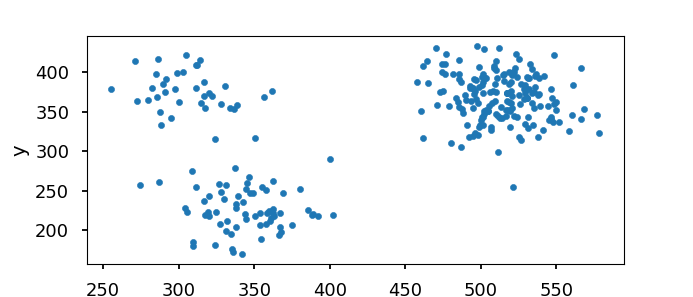

<AxesSubplot:xlabel='x', ylabel='y'>

In [133]:
df.plot.scatter('x', 'y')

### widgets

* If you want to have some interactive elements, `ipywidgets` makes it (relatively) easy to slap some controls on a demo.

In [9]:
# boring: just computes a number

def gradient_descent(x0, df, delta, eps):
    x = x0
    while np.linalg.norm(df(x)) > eps:
        x = x - delta * df(x)
    return x


def f(x):
    return x**2


def df(x):
    return x * 2


gradient_descent(5, df, 0.01, 0.0001)

0.000

<IPython.core.display.Javascript object>


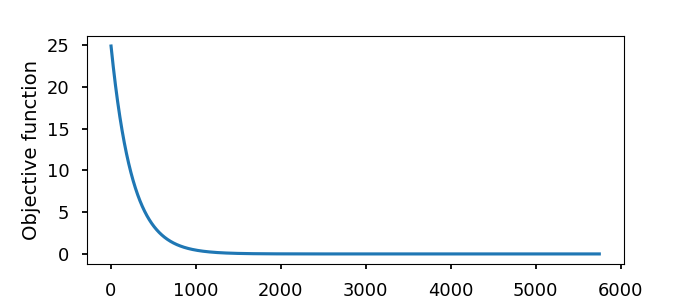

Text(0, 0.5, 'Objective function')

In [10]:
# slightly less boring: produces a plot
def gradient_descent(x0, df, delta, eps):
    x = x0
    while np.linalg.norm(df(x)) > eps:
        x = x - delta * df(x)
        yield x # useful trick if you have iterative algorithms...


delta = 0.001
eps = 0.0001
fs = [f(x) for x in gradient_descent(5, df, delta, eps)]
fig, ax = plt.subplots()
ax.plot(fs)
ax.set_xlabel("Iteration")
ax.set_ylabel("Objective function")

<IPython.core.display.Javascript object>


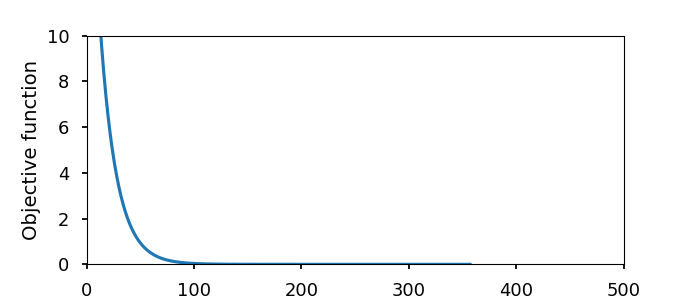

interactive(children=(FloatLogSlider(value=0.1, description='Step size', max=1.0, min=-5.0), Output(layout=Lay…

In [11]:
# less boring: produces a plot with interactive controls

# widgets to control settings
step_size = FloatLogSlider(value=0.1, min=-5, max=1, step=0.1, description="Step size")
fig, ax = plt.subplots()
ax.set_xlabel("Iteration")
ax.set_ylabel("Objective function")

# note: islice lets us end at max 2000 iters w/o code change
fs = [f(x) for x in islice(gradient_descent(5, df, 0.1, eps), 2000)]
line, = ax.plot(np.arange(len(fs)), fs)
ax.set_ylim(0, 10)
ax.set_xlim(0, 500)

def redraw(step_size):
    eps = 0.0001      
    fs = [f(x) for x in islice(gradient_descent(5, df, step_size, eps), 2000)]
    line.set_data(np.arange(len(fs)), fs)
    fig.canvas.draw()
    
plot = interactive(redraw, step_size=step_size)
# fix the layout height to avoid skipping
plot.children[-1].layout.height = "300px"
display(plot)

<IPython.core.display.Javascript object>


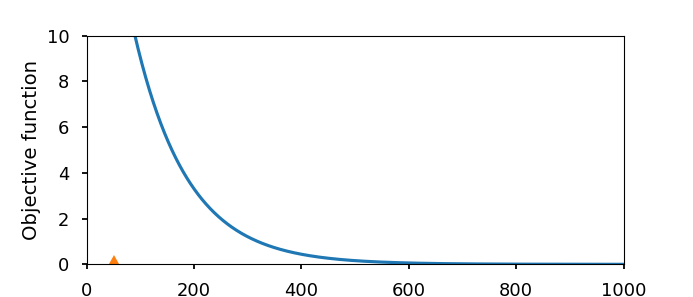

interactive(children=(FloatLogSlider(value=0.1, description='Step size', max=1.0, min=-5.0), Output(layout=Lay…

In [12]:
# not boring: produces an animated plot with interactive controls

# widgets to control settings
step_size = FloatLogSlider(value=0.1, min=-5, max=1, step=0.1, description="Step size")
anim = None

# create the plot
fig, ax = plt.subplots()
ax.set_xlabel("Iteration")
ax.set_ylabel("Objective function")
ax.set_ylim(0, 10)
ax.set_xlim(0, 1000)
fs = [f(x) for x in islice(gradient_descent(5, df, 0.1, eps), 2000)]
line, = ax.plot(fs)
point, = ax.plot([10], [10], "C1d")  # plot nothing, but get the placeholder

def animate(frame):
    # set x=iter, y=obj. fun at iter
    point.set_data([frame], [fs[frame]])

def redraw(step_size):
    global fs
    eps = 0.0001
    fs = [f(x) for x in islice(gradient_descent(5, df, step_size, eps), 2000)]
    line.set_data(np.arange(len(fs)), fs)    
    
anim = FuncAnimation(fig, animate, frames=200, interval=20)
plot = interactive(redraw, step_size=step_size)
# fix the layout height to avoid skipping
plot.children[-1].layout.height = "500px"
plot

<IPython.core.display.Javascript object>


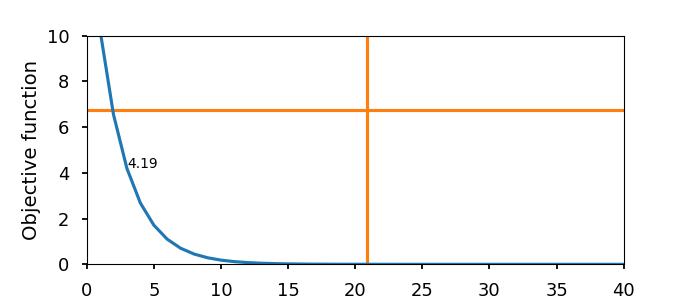

10

In [13]:
 #interactive clickable plot

# create the plot
fig, ax = plt.subplots()
ax.set_xlabel("Iteration")
ax.set_ylabel("Objective function")
ax.set_ylim(0, 10)
ax.set_xlim(0, 40)
fs = [f(x) for x in islice(gradient_descent(5, df, 0.1, eps), 2000)]

hline = ax.axhline(0, c='C1')
vline = ax.axvline(0, c='C1')
annotate = ax.text(0,0,'')

def onpick(event):    
    # when we click on a data point
    if event.ind<1:
        return    
    x = event.ind[0]
    y = fs[x]
    annotate.set_x(x)
    annotate.set_y(y)
    annotate.set_text(f"{y:.2f}")

def onclick(event):    
    # when we click on the plot
    hline.set_ydata(event.ydata)
    vline.set_xdata(event.xdata)

ax.plot(fs, picker=True)
fig.canvas.mpl_connect('button_press_event', onclick)
fig.canvas.mpl_connect('pick_event', onpick)

